# 1. raw data files and their format

analysis the data proper 

In [1]:
import pandas as pd
acc = pd.read_csv("road-accidents.csv",comment ="#", sep="|")
acc.shape

(51, 5)

In [2]:
acc.head(5)

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,Alabama,18.8,39,30,80
1,Alaska,18.1,41,25,94
2,Arizona,18.6,35,28,96
3,Arkansas,22.4,18,26,95
4,California,12.0,35,28,89


In [3]:
dri = pd.read_csv('miles-driven.csv',comment ="#", sep="|")
dri.shape
dri.head(5)

,state,million_miles_annually
0,Alabama,64914
1,Alaska,4593
2,Arizona,59575
3,Arkansas,32953
4,California,320784


# Read in and get an overview of the data

In [4]:
dri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   state                   51 non-null     object
 1   million_miles_annually  51 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 944.0+ bytes


In [5]:
acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   state                 51 non-null     object 
 1   drvr_fatl_col_bmiles  51 non-null     float64
 2   perc_fatl_speed       51 non-null     int64  
 3   perc_fatl_alcohol     51 non-null     int64  
 4   perc_fatl_1st_time    51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


# Create a textual and a graphical summary of the data

In [6]:
#import matplotlib.pyplot as plt
#import seaborn as sns
acc.describe()

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
count,51.000000,51.000000,51.000000,51.00000
mean,15.790196,31.725490,30.686275,88.72549
std,4.122002,9.633438,5.132213,6.96011
min,5.900000,13.000000,16.000000,76.00000
25%,12.750000,23.000000,28.000000,83.50000
50%,15.600000,34.000000,30.000000,88.00000
75%,18.500000,38.000000,33.000000,95.00000
max,23.900000,54.000000,44.000000,100.00000


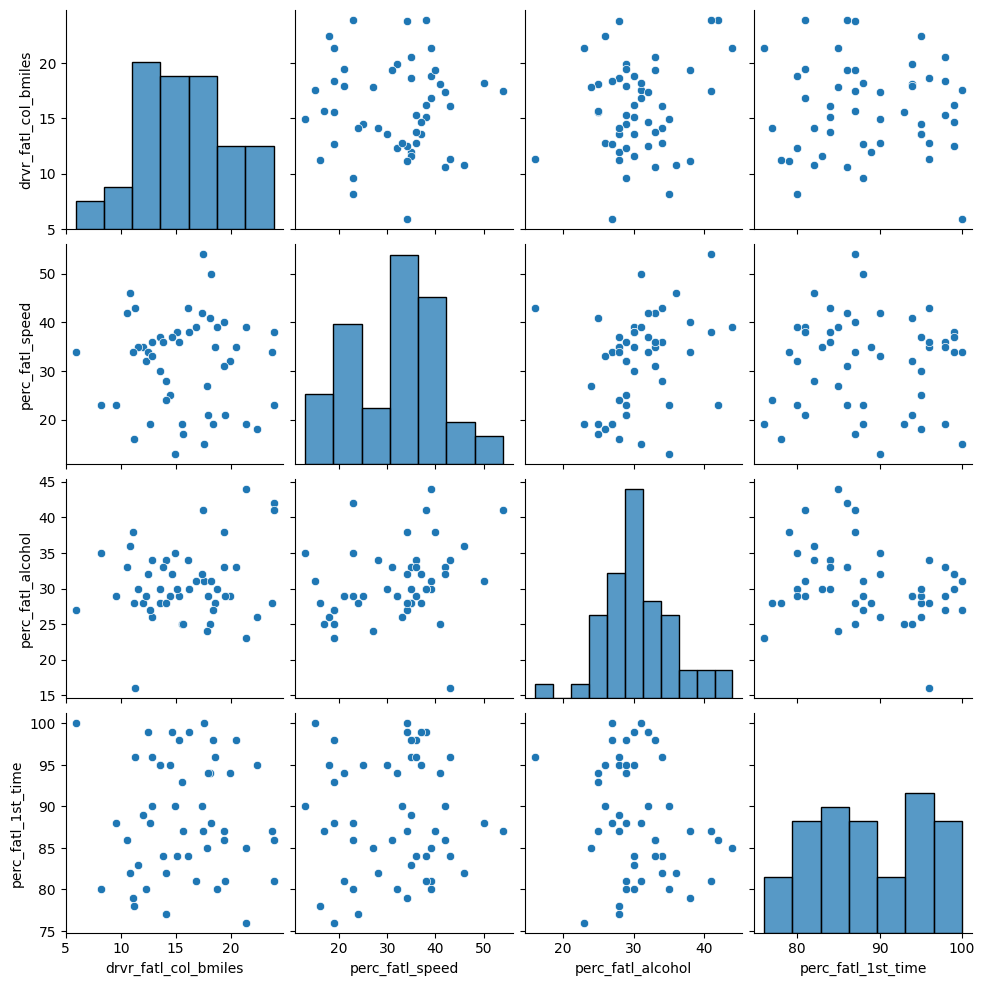

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(acc)

In [11]:
dri.describe()

,million_miles_annually
count,51.000000
mean,57851.019608
std,59898.414088
min,3568.000000
25%,17450.000000
50%,46606.000000
75%,71922.500000
max,320784.000000


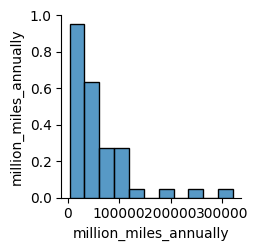

In [12]:
sns.pairplot(dri)

# Quantify the association of features and accidents

In [13]:
acc.corr()

/tmp/ipykernel_6794/1664689736.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  acc.corr()


,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
drvr_fatl_col_bmiles,1.000000,-0.029080,0.199426,-0.017942
perc_fatl_speed,-0.029080,1.000000,0.286244,0.014066
perc_fatl_alcohol,0.199426,0.286244,1.000000,-0.245455
perc_fatl_1st_time,-0.017942,0.014066,-0.245455,1.000000


In [14]:
dri.corr()

/tmp/ipykernel_6794/1165578892.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dri.corr()


,million_miles_annually
million_miles_annually,1.0


# Fit a multivariate linear regression

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
feature = acc[['perc_fatl_speed','perc_fatl_alcohol','perc_fatl_1st_time']]

In [17]:
predict = acc['drvr_fatl_col_bmiles']

In [18]:
model = LinearRegression()
model.fit(feature,predict)
w = model.coef_
print(w)

[-0.04180041  0.19086404  0.02473301]


# Perform PCA on standardized data

In [19]:
import numpy as np
from sklearn.preprocessing import StandardScaler

In [20]:
s = StandardScaler()
f_s = s.fit_transform(feature)

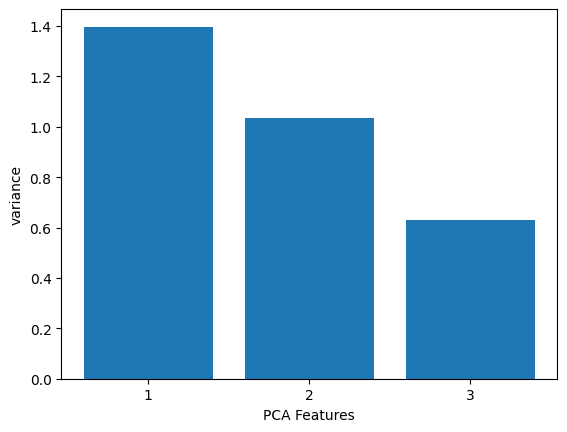

In [21]:
from sklearn.decomposition import PCA
p = PCA()
p.fit(f_s)
plt.bar(range(1,p.n_components_ +1), p.explained_variance_)
plt.xticks([1,2,3])
plt.ylabel('variance')
plt.xlabel('PCA Features')
plt.show()

# Visualize the first two principal components

<function matplotlib.pyplot.show(close=None, block=None)>

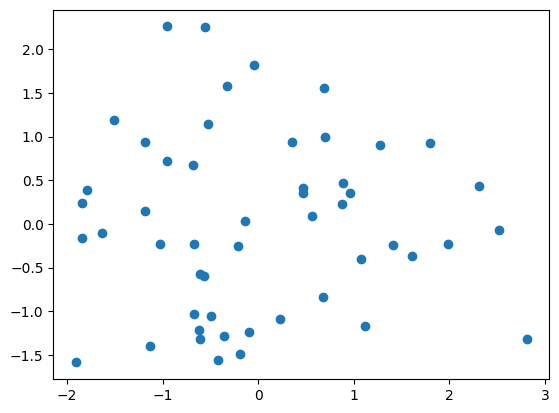

In [22]:
p = PCA(n_components = 2)
p.fit(f_s)
tran = p.transform(f_s)
x = tran[:,0]
y = tran[:,1]
plt.scatter(x,y)
plt.show

# Find clusters of similar states in the data

/home/sifi-world/my_project_dir/my_project_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/sifi-world/my_project_dir/my_project_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/sifi-world/my_project_dir/my_project_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/sifi-world/my_project_dir/my_project_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Se

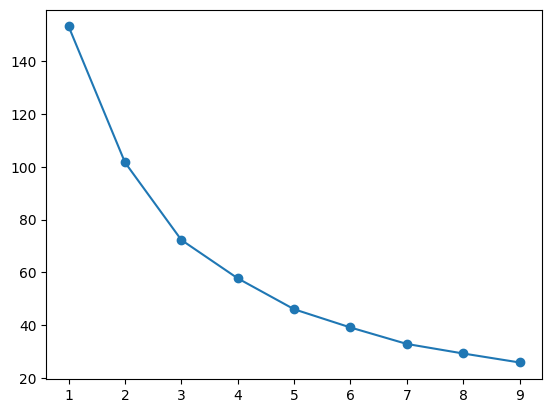

In [37]:
from sklearn.cluster import KMeans
k = range(1,10)
it = []
for i in k:
    km = KMeans(n_clusters = i, random_state = 8)
    km.fit(f_s)
    it.append(km.inertia_)
plt.plot(k, it, marker = 'o')

# KMeans to visualize clusters in the PCA scatter plot

/home/sifi-world/my_project_dir/my_project_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


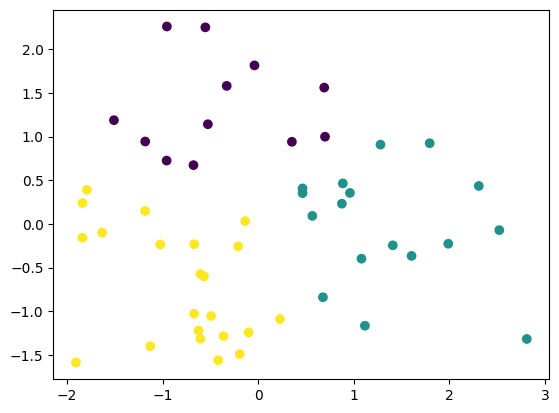

In [38]:
model = KMeans(n_clusters = 3)
model.fit(f_s)
label = model.predict(f_s)
plt.scatter(x,y,c= label)
plt.show()

# Visualize the feature differences between the clusters

In [39]:
acc['cluster_num'] = label
p = acc.melt(id_vars ='cluster_num', var_name = 'measument', value_name ='value', value_vars = ['perc_fatl_speed','perc_fatl_alcohol','perc_fatl_1st_time'])

# Computer the number of accidents within each cluster

In [40]:
acc.head(5)

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,cluster_num
0,Alabama,18.8,39,30,80,1
1,Alaska,18.1,41,25,94,2
2,Arizona,18.6,35,28,96,2
3,Arkansas,22.4,18,26,95,2
4,California,12.0,35,28,89,2


In [41]:
dri.head(5)

,state,million_miles_annually
0,Alabama,64914
1,Alaska,4593
2,Arizona,59575
3,Arkansas,32953
4,California,320784


In [42]:
df = acc.merge(dri,on='state')

In [43]:
df['num_of_accidents'] = (df['drvr_fatl_col_bmiles'] * df['million_miles_annually'])/100

In [44]:
df.head()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,cluster_num,million_miles_annually,num_of_accidents
0,Alabama,18.8,39,30,80,1,64914,12203.832
1,Alaska,18.1,41,25,94,2,4593,831.333
2,Arizona,18.6,35,28,96,2,59575,11080.950
3,Arkansas,22.4,18,26,95,2,32953,7381.472
4,California,12.0,35,28,89,2,320784,38494.080


/tmp/ipykernel_6794/4002285982.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x= 'cluster_num', y='num_of_accidents',data = df, estimator=sum, ci = None)


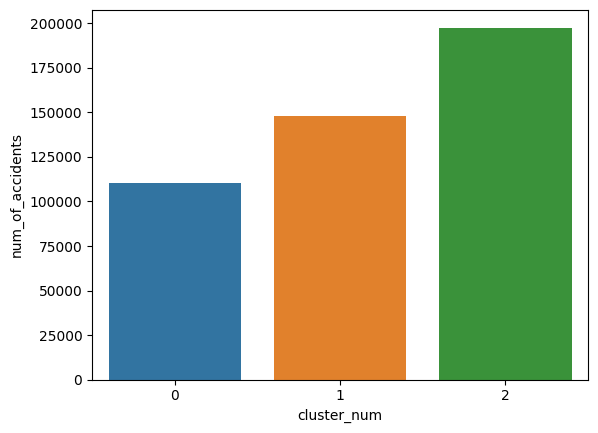

In [45]:
sns.barplot(x= 'cluster_num', y='num_of_accidents',data = df, estimator=sum, ci = None)
sum_fatal = df.groupby('cluster_num')['num_of_accidents'].agg(['count','mean','sum',])

In [46]:
sum_fatal

,count,mean,sum
cluster_num,,,
0,12,9203.853667,110446.244
1,17,8721.327588,148262.569
2,22,8983.785955,197643.291


# Make a decision when there is no clear right choice

In [47]:
chosen_cluster = 'second cluster'